In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
import librosa
import os

In [2]:
labels_new = pd.read_csv('labels_new.csv')
display(labels_new.head())

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


## Feature Engineering

In [3]:
# Function to extract features from audio files
def extract_features(file_path):
    audio_data, sr = librosa.load(file_path)
    
    tempo, beats = librosa.beat.beat_track(y=audio_data, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    rms = librosa.feature.rms(y=audio_data)
    zcr = librosa.feature.zero_crossing_rate(y=audio_data)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr)
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio_data), sr=sr)
    
    mean_centroid = spectral_centroid.mean()
    mean_bandwidth = spectral_bandwidth.mean()
    mean_rms = rms.mean()
    mean_zcr = zcr.mean()
    mean_mfccs = [mfcc.mean() for mfcc in mfccs]
    mean_chroma = chroma.mean()
    mean_contrast = spectral_contrast.mean(axis=1) # Mean along frequency axis
    mean_tonnetz = tonnetz.mean()
    
    return {
        'File': os.path.basename(file_path),
        'Tempo': tempo,
        'Mean Spectral Centroid': mean_centroid,
        'Mean Spectral Bandwidth': mean_bandwidth,
        'Mean RMS Energy': mean_rms,
        'Mean Zero Crossing Rate': mean_zcr,
        'Mean MFCC 1': mean_mfccs[0],  # Assuming 1st MFCC
        'Mean Chroma': mean_chroma.mean(),  # Mean across chroma features
        'Mean Spectral Contrast': mean_contrast.mean(),  # Mean spectral contrast
        'Mean Tonnetz': mean_tonnetz.mean()  # Mean across tonnetz features
        # Add more features or modify as needed
    }


In [4]:
labeled_path = 'C:/Users/henry/Documents/Haagse Hogeschool works/Machine Learning/ML_Opdracht3/labeled'
audio_file_paths = [labeled_path + '/' + str(file) for file in labels_new['filename']]
labeled_features = [extract_features(file) for file in audio_file_paths]

audio_features = pd.DataFrame(labeled_features)
audio_labeled = audio_features.copy()
audio_labeled = audio_labeled.merge(labels_new, left_on='File', right_on='filename')
audio_labeled.set_index('File', inplace=True)
audio_labeled.drop('filename', axis=1, inplace=True)

display(audio_labeled)

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz,genre
File,,,,,,,,,,
m00248.wav,107.666016,2656.941556,2337.704931,0.113737,0.158715,-75.538986,0.581162,18.332436,-0.007153,metal
m00230.wav,123.046875,3760.408113,3052.844395,0.096326,0.212367,-89.709557,0.437729,18.982966,-0.007863,country
m00637.wav,107.666016,2290.939646,2181.566339,0.102242,0.113310,-122.775452,0.503631,19.579162,-0.010936,hiphop
m00627.wav,123.046875,2378.492400,2092.421780,0.131562,0.141266,-57.683716,0.513275,19.526217,-0.008960,metal
m00138.wav,123.046875,1995.276965,2295.684096,0.078380,0.070276,-198.732117,0.418510,21.406461,0.021368,reggae
m00192.wav,129.199219,1878.494004,1964.814673,0.115069,0.111576,-85.308342,0.346841,18.891623,-0.013215,classical
m00429.wav,151.999081,2272.540503,2327.148207,0.109146,0.104439,-109.512810,0.482570,20.252485,0.009709,hiphop
m00623.wav,112.347147,3089.748473,2973.746995,0.142846,0.136156,-94.260483,0.432838,17.977878,-0.002607,reggae
m00002.wav,129.199219,1451.862124,1920.270843,0.050480,0.051224,-298.756134,0.201584,24.220021,-0.002485,jazz


In [5]:
directory = 'C:/Users/henry/Documents/Haagse Hogeschool works/Machine Learning/ML_Opdracht3/unlabeled'

# Get all files in the directory
audio_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.wav')]

unlabeled_features = [extract_features(file) for file in audio_files]
audio_features = pd.DataFrame(unlabeled_features)
audio_features.set_index('File', inplace=True)
audio_unlabeled = audio_features.copy()

display(audio_unlabeled)

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
File,,,,,,,,,
m00003.wav,135.999178,2254.606986,2071.028440,0.136221,0.120116,-82.511108,0.469243,20.380788,0.019258
m00012.wav,103.359375,2908.300131,2286.252592,0.217475,0.178108,-1.913298,0.431165,20.044021,-0.000020
m00013.wav,184.570312,1952.607933,1865.996047,0.029083,0.123423,-287.603699,0.289961,23.250822,0.009197
m00043.wav,135.999178,2384.634958,2072.759900,0.100411,0.126073,-120.147491,0.465585,19.720750,0.030229
m00044.wav,143.554688,790.507005,900.409298,0.018833,0.052088,-437.604401,0.217778,20.252849,-0.030368
...,...,...,...,...,...,...,...,...,...
m00971.wav,107.666016,1525.791709,1588.217850,0.038885,0.091590,-246.158646,0.309741,19.058683,0.041601
m00973.wav,129.199219,3669.810467,3295.063699,0.259782,0.161797,-8.573006,0.423550,17.701767,-0.024535
m00988.wav,103.359375,3941.417697,3361.641125,0.240724,0.167480,-56.153061,0.433070,17.446198,-0.002433


## Unsupervised Learning

In [6]:
scaler = StandardScaler()
audio_unlabeled_scaled = scaler.fit_transform(audio_unlabeled)
audio_unlabeled_scaled = pd.DataFrame(audio_unlabeled_scaled, columns=audio_unlabeled.columns)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

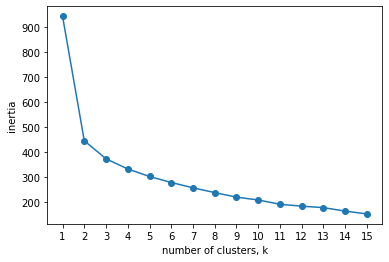

In [7]:
from sklearn.cluster import KMeans

inertia = []

ks = range(1,16)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(audio_unlabeled_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


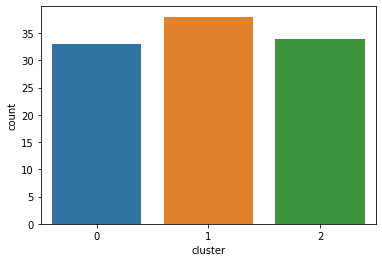

In [79]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(audio_unlabeled_scaled)
audio_unlabeled['cluster'] = labels
sns.countplot(data=audio_unlabeled, x=audio_unlabeled['cluster'])
plt.show()

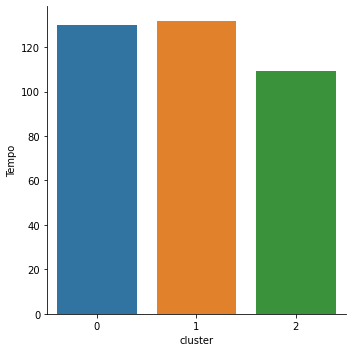

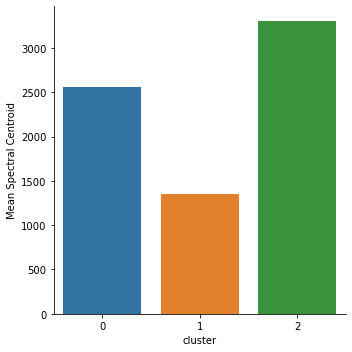

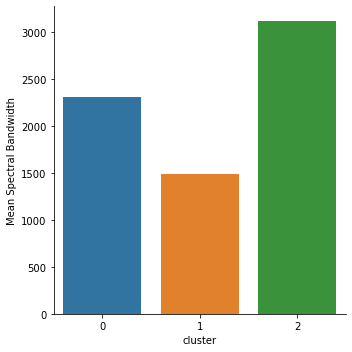

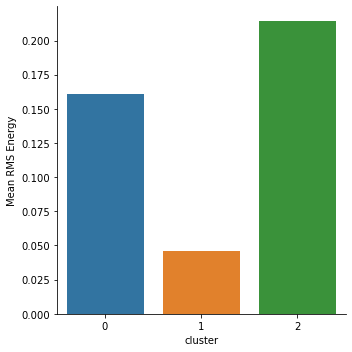

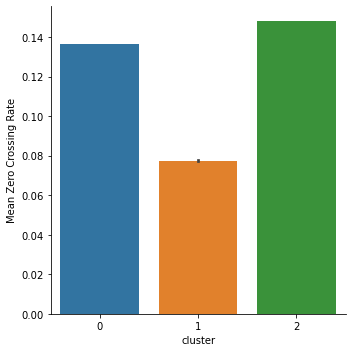

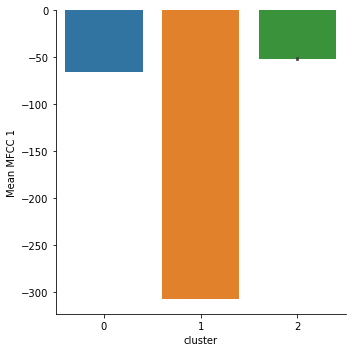

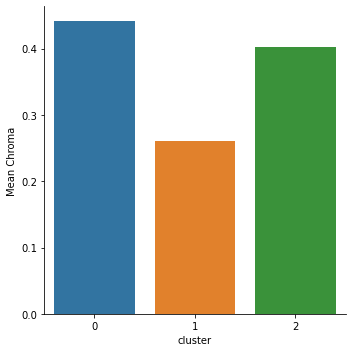

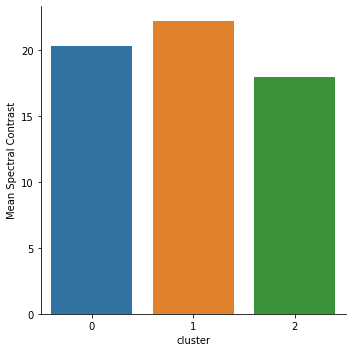

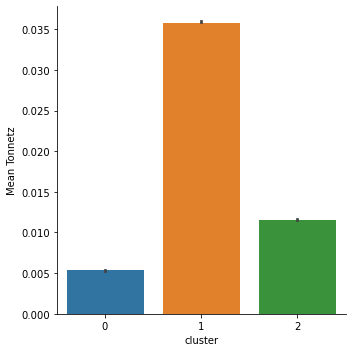

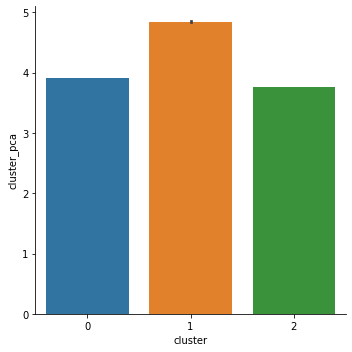

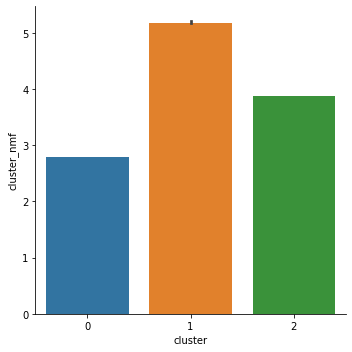

In [80]:
for col in audio_unlabeled.columns.drop('cluster'):
    sns.catplot(data=audio_unlabeled, x='cluster', y=col, kind='bar', ci=True)
    plt.show()

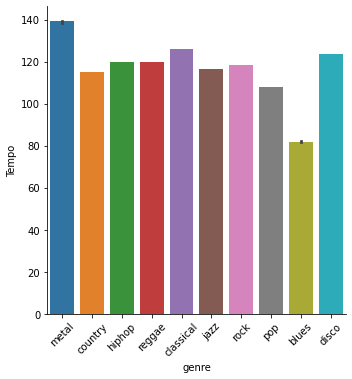

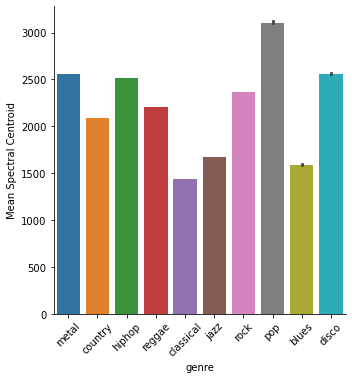

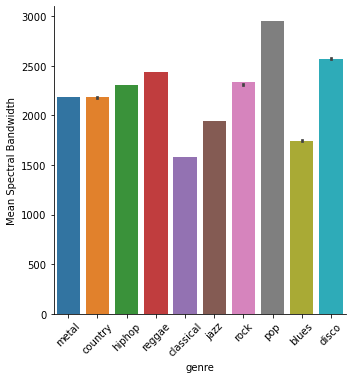

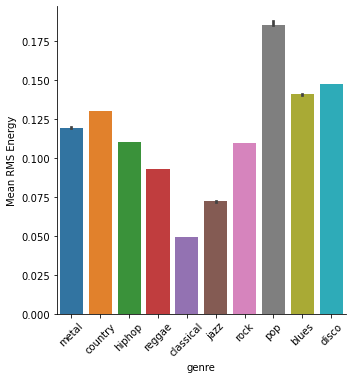

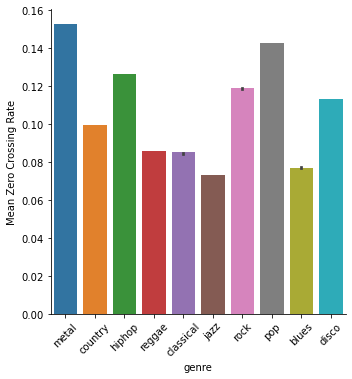

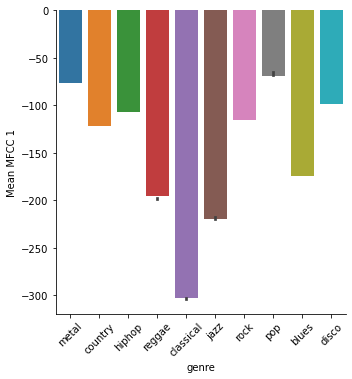

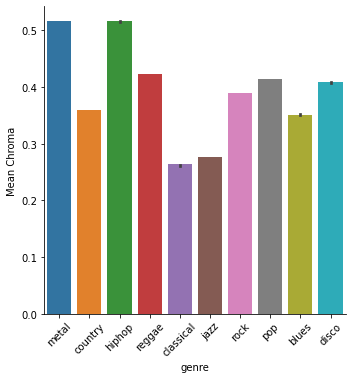

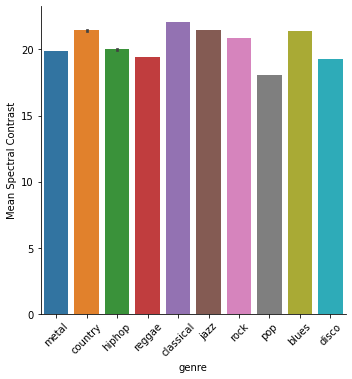

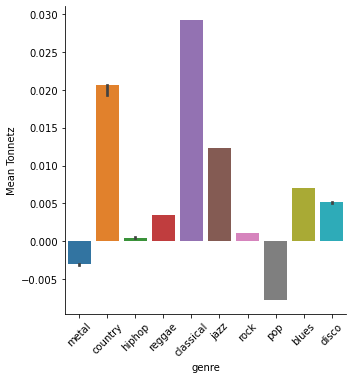

In [81]:
for col in audio_labeled.columns.drop('genre'):
    sns.catplot(data=audio_labeled, x='genre', y=col, kind='bar', ci=True)
    plt.xticks(rotation=45)
    plt.show()

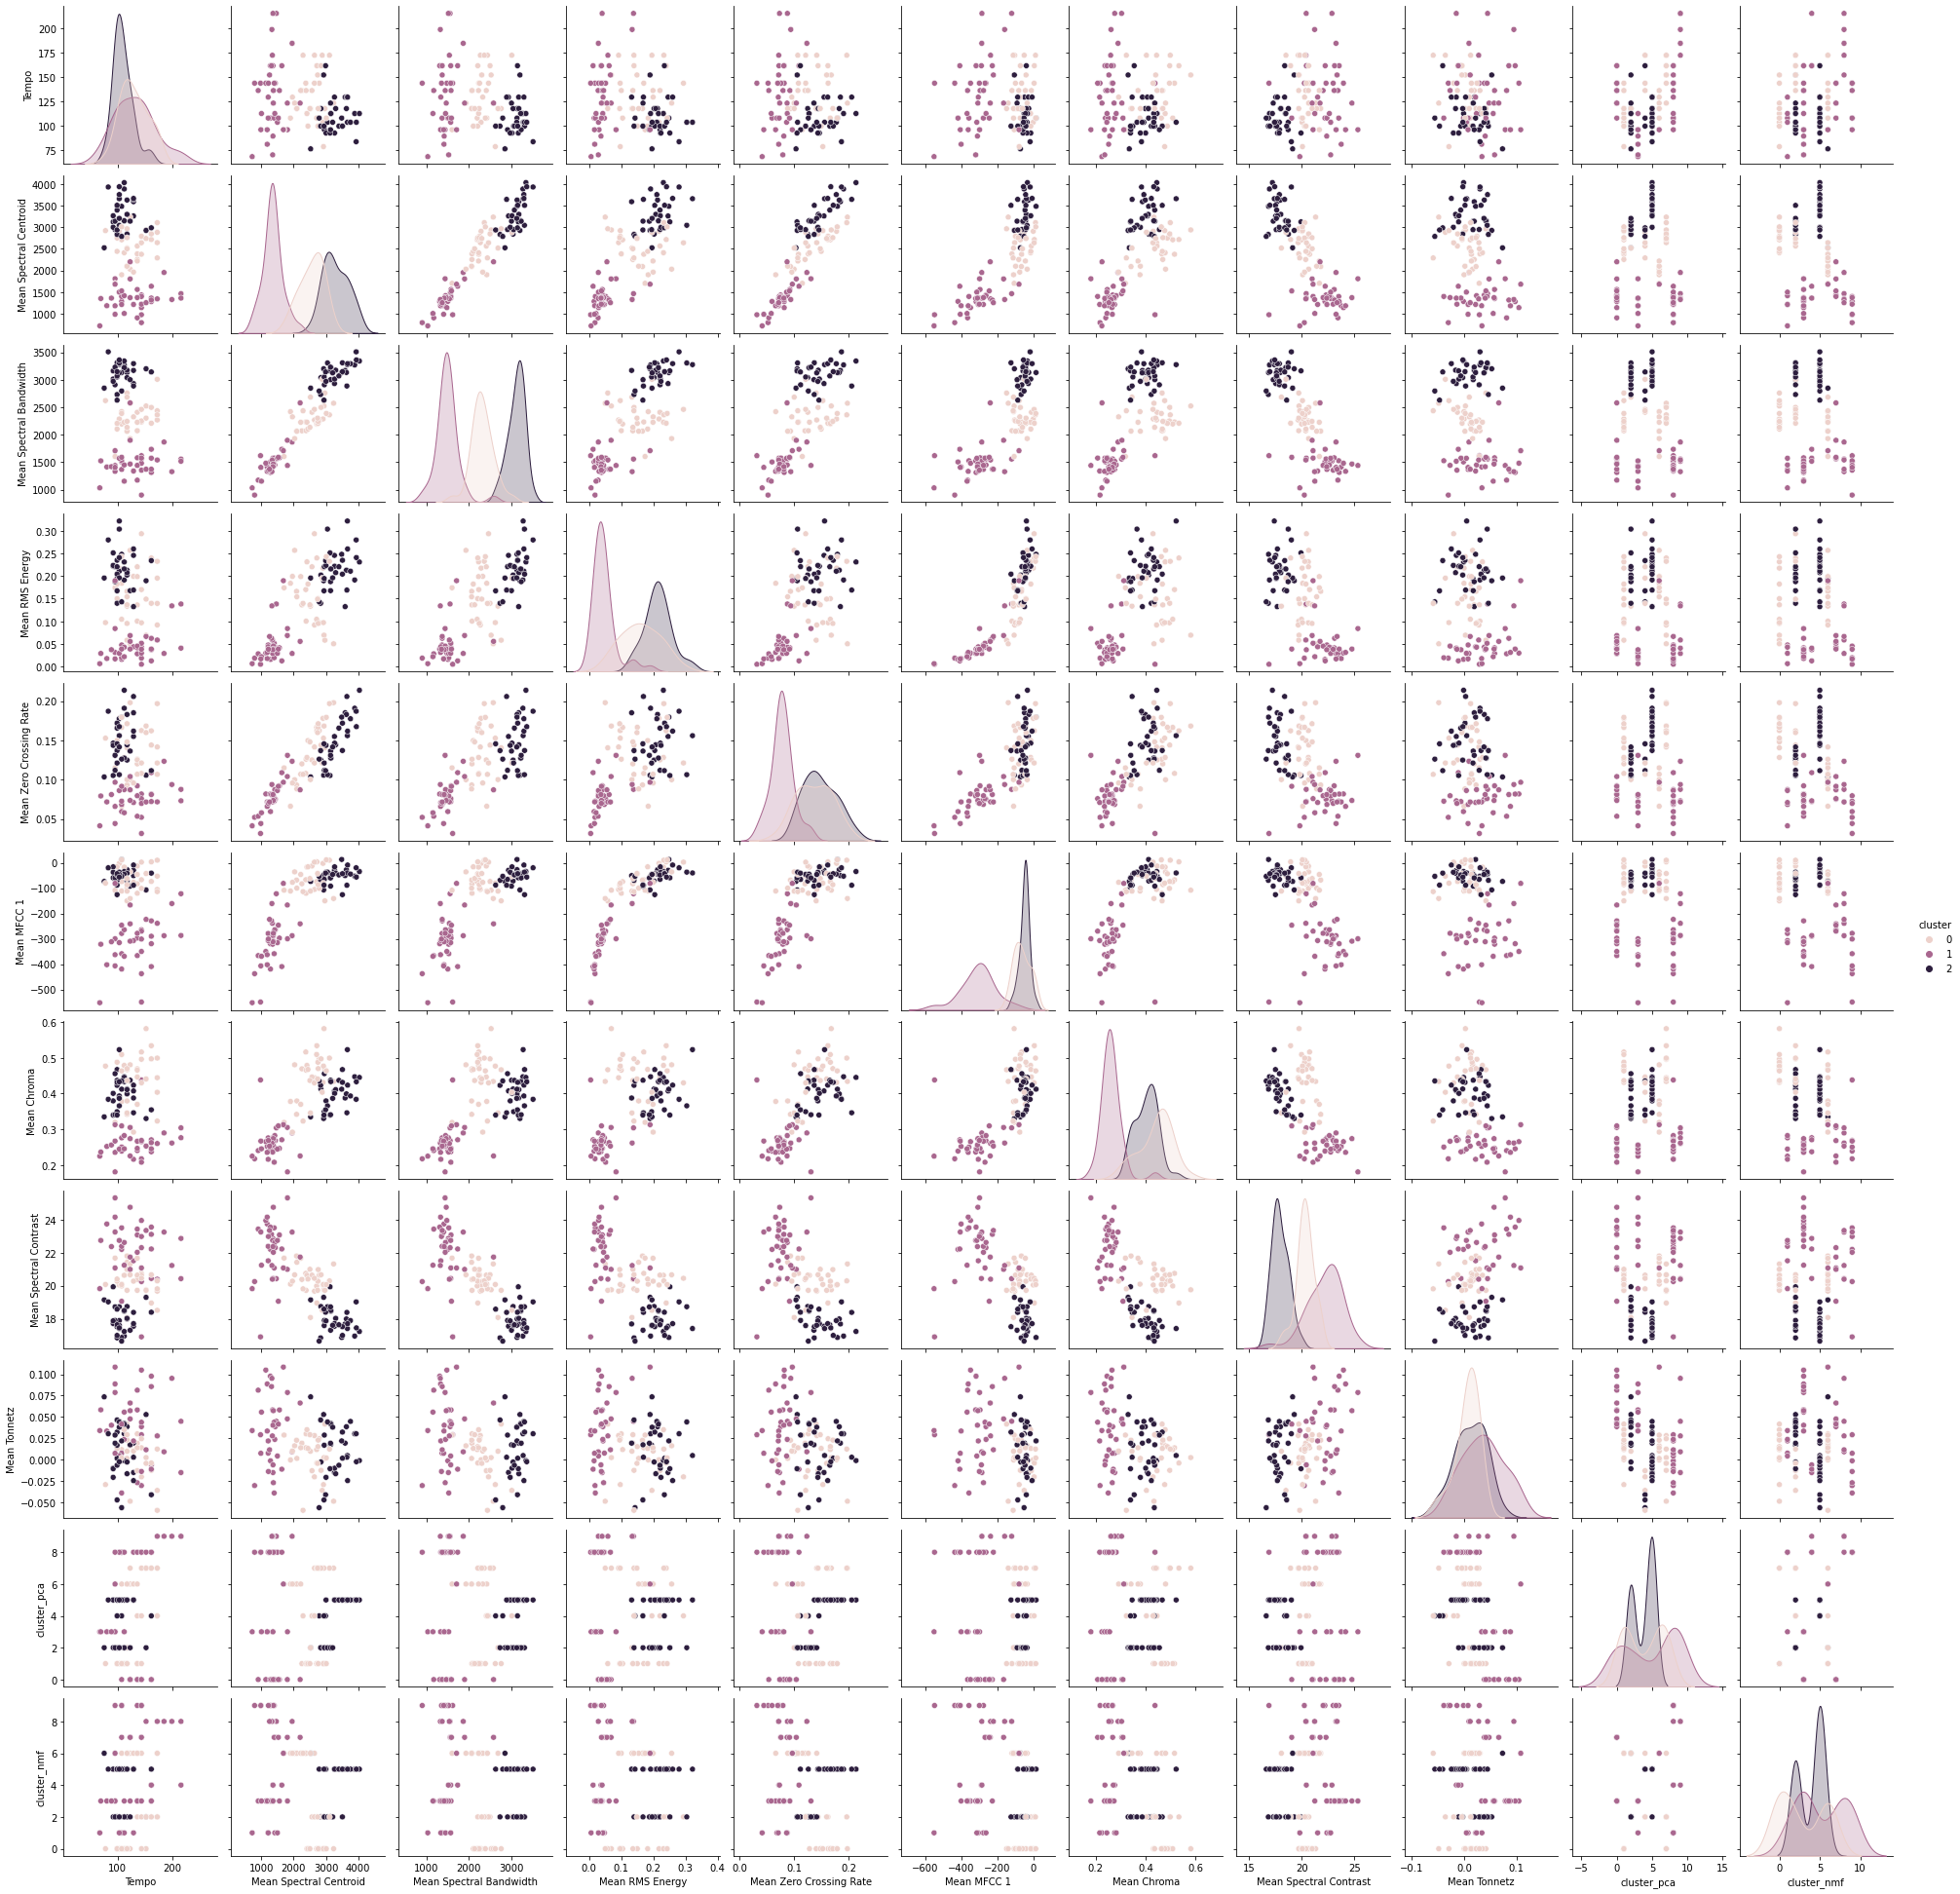

In [82]:
sns.pairplot(data=audio_unlabeled, hue='cluster')
plt.show()

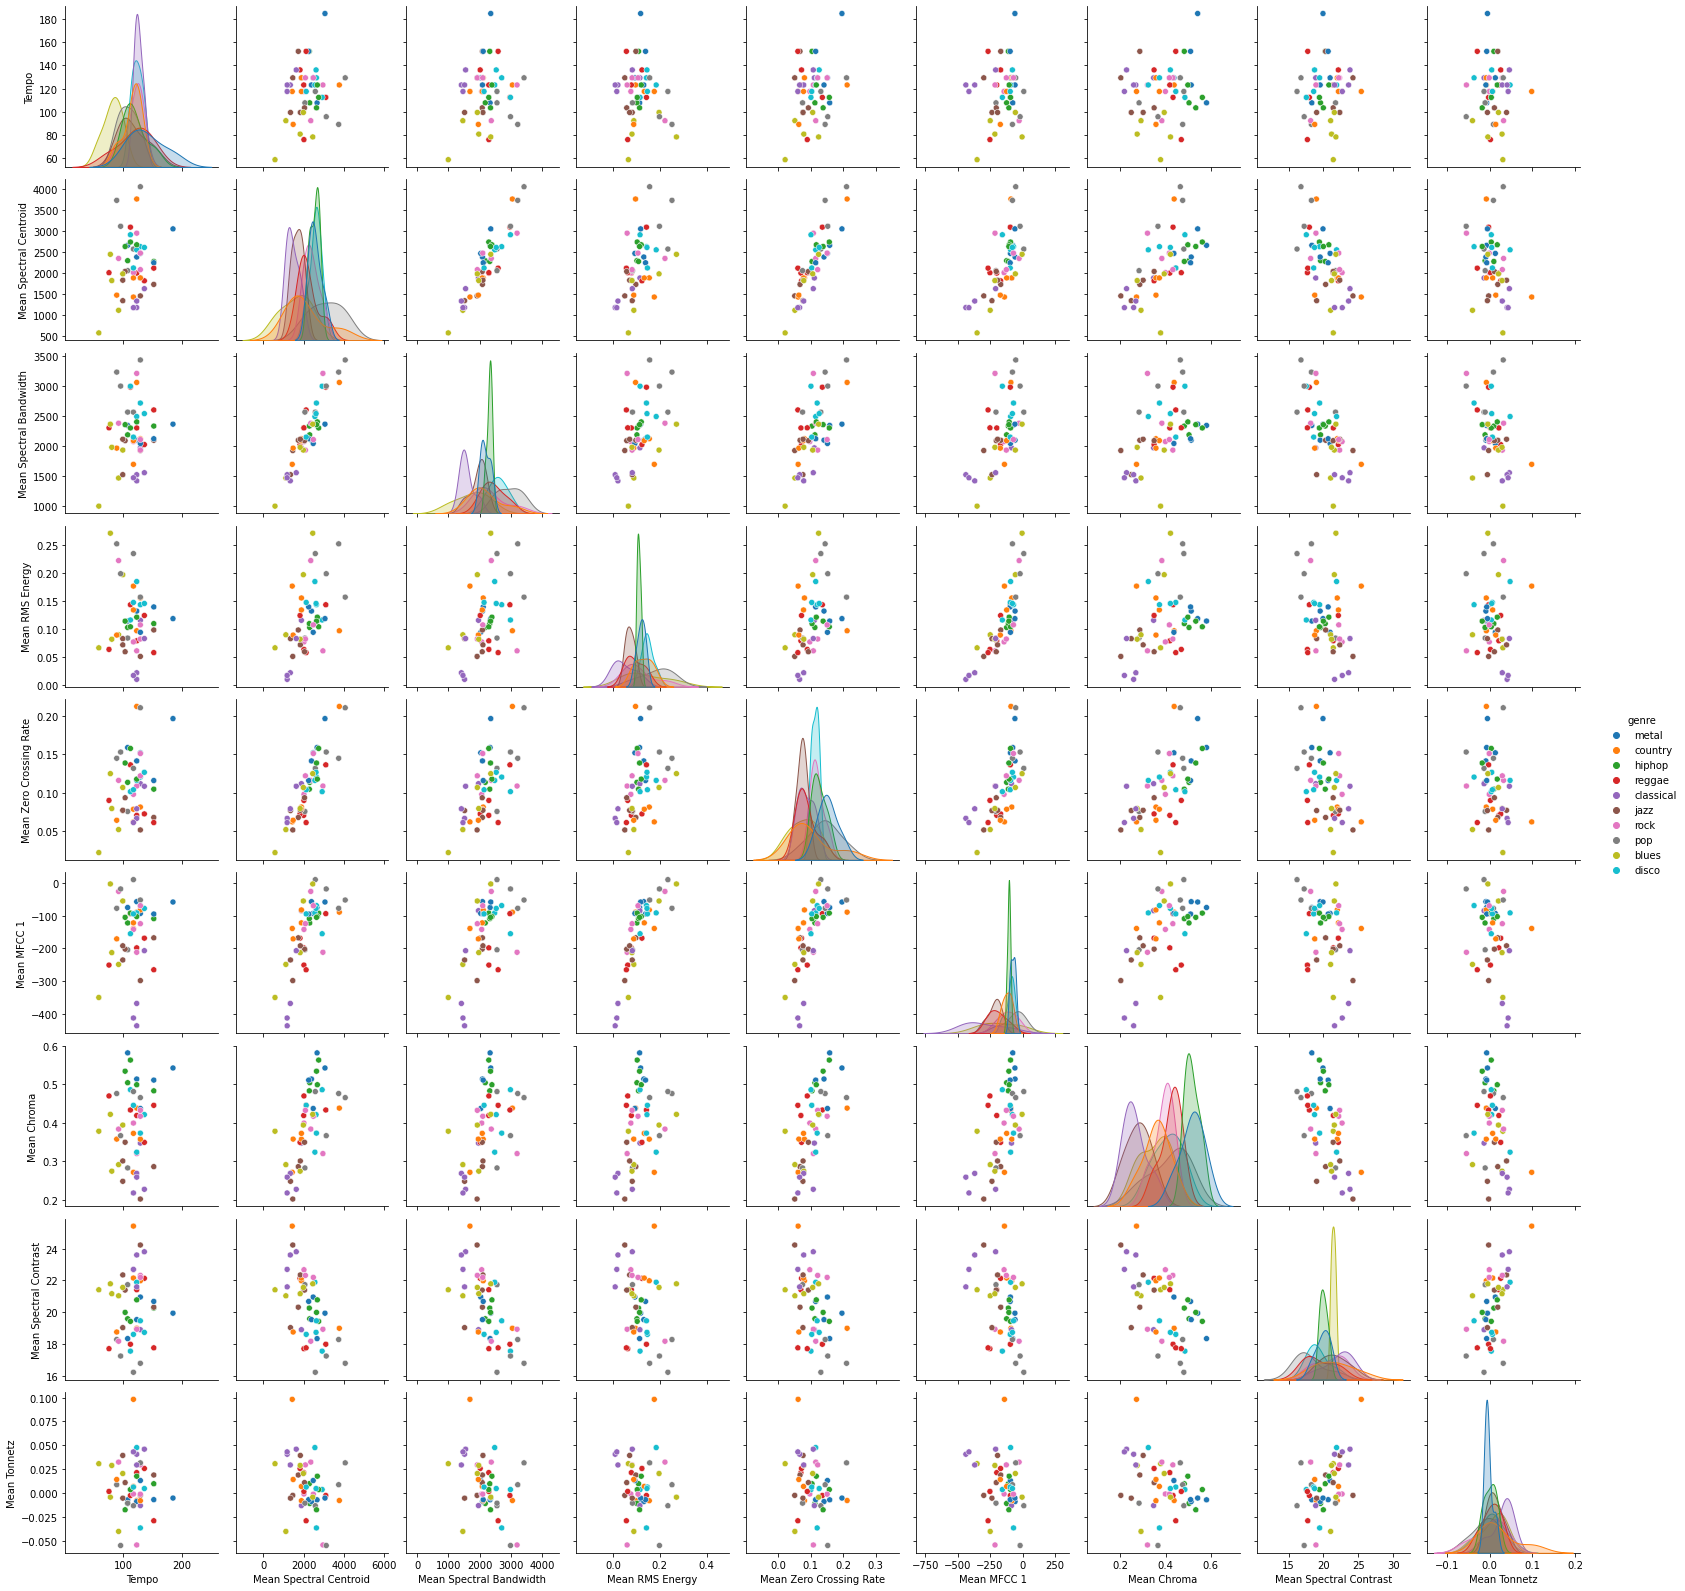

In [83]:
sns.pairplot(data=audio_labeled, hue='genre')
plt.show()

In [84]:
cluster_means = audio_unlabeled[['Tempo', 'Mean Spectral Centroid', 'Mean Spectral Bandwidth',
                             'Mean RMS Energy', 'Mean Zero Crossing Rate', 'Mean MFCC 1',
                             'Mean Chroma', 'Mean Spectral Contrast', 'Mean Tonnetz',
                             'cluster']].groupby('cluster').mean()
genre_means = audio_labeled.groupby('genre').mean()

display(cluster_means, genre_means)

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
cluster,,,,,,,,,
0,129.764053,2555.663312,2307.671855,0.160852,0.136639,-65.936790,0.441715,20.307662,0.005379
1,131.609167,1348.392853,1488.180958,0.046311,0.077560,-307.676849,0.261120,22.161511,0.035775
2,109.151192,3300.624817,3115.079501,0.214097,0.148119,-51.254253,0.403037,17.947842,0.011578


,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
genre,,,,,,,,,
blues,81.889631,1583.387647,1743.755155,0.140737,0.076771,-174.428619,0.351571,21.382800,0.007091
classical,125.749196,1435.502063,1583.313469,0.048953,0.085169,-302.222687,0.263555,22.110814,0.029179
country,115.251335,2083.312910,2181.117729,0.129948,0.099472,-121.193581,0.359069,21.450688,0.020666
disco,123.609251,2561.331811,2572.697428,0.146992,0.113463,-98.128120,0.409466,19.239101,0.005122
hiphop,119.683699,2519.631562,2310.307216,0.109819,0.126286,-106.722992,0.516144,19.999706,0.000478
jazz,116.665141,1675.108026,1944.565406,0.072097,0.073069,-219.556396,0.276894,21.454712,0.012262
metal,139.296301,2557.961237,2188.541721,0.119193,0.152806,-76.188957,0.516712,19.881724,-0.003056
pop,107.825021,3102.778575,2952.233656,0.184845,0.143026,-68.912933,0.413943,18.045874,-0.007740
reggae,119.878364,2202.812513,2436.350580,0.093046,0.085836,-195.835129,0.422877,19.391925,0.003404


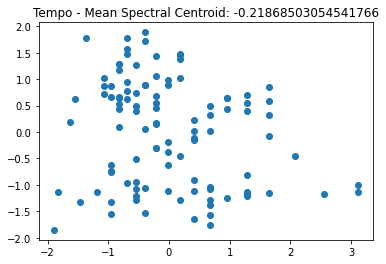

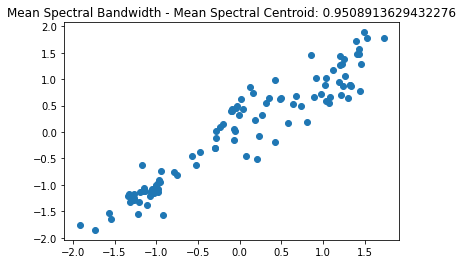

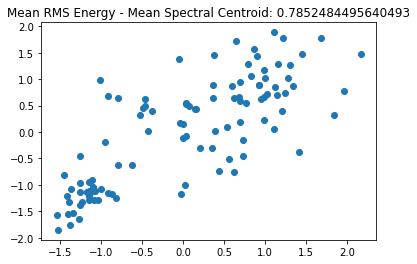

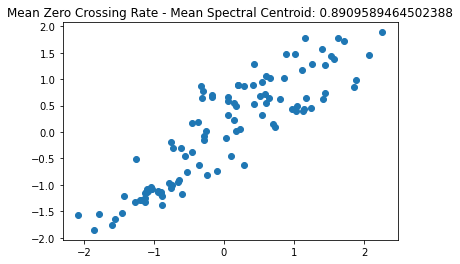

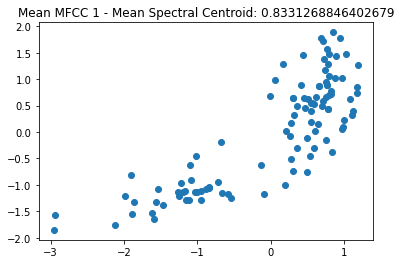

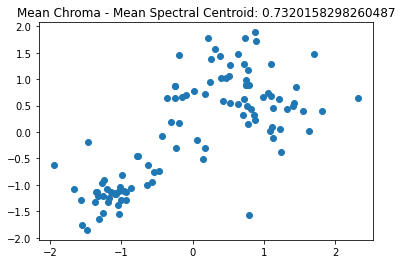

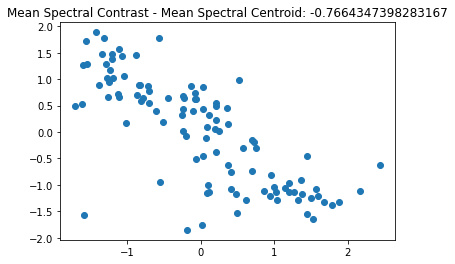

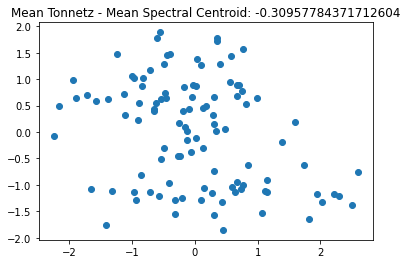

In [85]:
for col in audio_unlabeled_scaled.columns.drop('Mean Spectral Centroid'):
    plt.scatter(audio_unlabeled_scaled[col], audio_unlabeled_scaled['Mean Spectral Centroid'])
    plt.title(str(col) + ' - Mean Spectral Centroid: ' + str(np.corrcoef(audio_unlabeled_scaled[col], audio_unlabeled_scaled['Mean Spectral Centroid'])[1,0]))
    plt.show()

### PCA

In [86]:
pca = PCA(n_components=5)
transformed_data = pd.DataFrame(pca.fit_transform(audio_unlabeled_scaled))
display(transformed_data)

,0,1,2,3,4
0,-0.352873,0.561470,0.481236,0.531053,-0.106632
1,-1.944108,-0.160973,-0.100746,0.968418,-0.710705
2,2.131773,1.872470,0.573858,0.508268,0.417478
3,-0.251681,0.386301,0.571636,0.547454,0.546759
4,3.742073,1.306680,-1.819459,-0.757730,0.418105
...,...,...,...,...,...
100,1.751371,-0.740431,-0.302399,-0.226913,0.835497
101,-3.262552,0.641742,-0.442555,-0.519397,-0.152989
102,-3.311416,-0.429078,-0.479025,-0.239262,0.321854
103,3.708926,-0.557889,-1.478045,0.262384,-0.246446


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


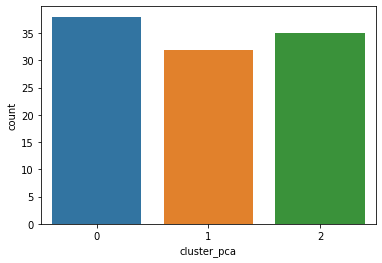

In [87]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(transformed_data)
audio_unlabeled['cluster_pca'] = labels
sns.countplot(data=audio_unlabeled, x=audio_unlabeled['cluster_pca'])
plt.show()

In [90]:
group_pca = audio_unlabeled[['Tempo', 'Mean Spectral Centroid', 'Mean Spectral Bandwidth',
                             'Mean RMS Energy', 'Mean Zero Crossing Rate', 'Mean MFCC 1',
                             'Mean Chroma', 'Mean Spectral Contrast', 'Mean Tonnetz',
                             'cluster_pca']].groupby('cluster_pca').mean()
display(group_pca, genre_means)

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
cluster_pca,,,,,,,,,
0,131.609167,1348.392853,1488.180958,0.046311,0.077560,-307.676849,0.261120,22.161511,0.035775
1,106.176326,3322.023955,3111.528265,0.214238,0.150589,-49.852940,0.406822,17.891781,0.011933
2,131.306053,2578.667615,2357.056280,0.163766,0.135037,-66.378990,0.436045,20.224070,0.005408


,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
genre,,,,,,,,,
blues,81.889631,1583.387647,1743.755155,0.140737,0.076771,-174.428619,0.351571,21.382800,0.007091
classical,125.749196,1435.502063,1583.313469,0.048953,0.085169,-302.222687,0.263555,22.110814,0.029179
country,115.251335,2083.312910,2181.117729,0.129948,0.099472,-121.193581,0.359069,21.450688,0.020666
disco,123.609251,2561.331811,2572.697428,0.146992,0.113463,-98.128120,0.409466,19.239101,0.005122
hiphop,119.683699,2519.631562,2310.307216,0.109819,0.126286,-106.722992,0.516144,19.999706,0.000478
jazz,116.665141,1675.108026,1944.565406,0.072097,0.073069,-219.556396,0.276894,21.454712,0.012262
metal,139.296301,2557.961237,2188.541721,0.119193,0.152806,-76.188957,0.516712,19.881724,-0.003056
pop,107.825021,3102.778575,2952.233656,0.184845,0.143026,-68.912933,0.413943,18.045874,-0.007740
reggae,119.878364,2202.812513,2436.350580,0.093046,0.085836,-195.835129,0.422877,19.391925,0.003404


### NMF

In [91]:
scaler = MinMaxScaler()
data_matrix = scaler.fit_transform(audio_unlabeled)

# Initialize NMF with desired number of components
num_components = 3  # Choose appropriate number of components
model = NMF(n_components=num_components, init='random', random_state=0)

# Fit the model to your data
W = model.fit_transform(data_matrix)
H = model.components_

unlabeled_nmf = pd.DataFrame(W.dot(H))
display(unlabeled_nmf)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.517924,0.509399,0.489451,0.454441,0.554997,0.855722,0.621328,0.566641,0.489085,0.074709,0.914071,0.417615
1,0.356484,0.637265,0.616066,0.566862,0.632580,0.893702,0.712245,0.264750,0.285420,0.040715,1.110039,0.161259
2,0.554335,0.259853,0.290421,0.213905,0.304437,0.561687,0.250511,0.771754,0.698680,0.558520,0.103021,0.777286
3,0.505982,0.498741,0.479211,0.444933,0.543164,0.837164,0.608123,0.553087,0.477573,0.072796,0.894946,0.407441
4,0.399611,0.110112,0.127962,0.088489,0.157560,0.329921,0.122215,0.584432,0.500151,0.340309,0.000000,0.565797
...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.370887,0.270919,0.309587,0.220026,0.269821,0.455267,0.202788,0.492863,0.508058,0.588273,0.046804,0.572794
101,0.277339,0.846610,0.919478,0.708660,0.709956,0.955608,0.611904,0.142515,0.434469,1.054711,0.573925,0.424315
102,0.264296,0.851484,0.927554,0.711517,0.708604,0.949264,0.604513,0.123391,0.427814,1.085410,0.552429,0.420548
103,0.467405,0.134324,0.156099,0.107947,0.188186,0.390582,0.145370,0.682112,0.586919,0.408784,0.000000,0.664138


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


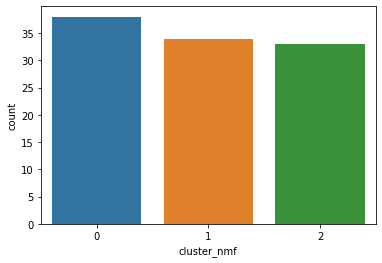

In [92]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(unlabeled_nmf)
audio_unlabeled['cluster_nmf'] = labels
sns.countplot(data=audio_unlabeled, x=audio_unlabeled['cluster_nmf'])
plt.show()

In [93]:
group_nmf = audio_unlabeled[['Tempo', 'Mean Spectral Centroid', 'Mean Spectral Bandwidth',
                             'Mean RMS Energy', 'Mean Zero Crossing Rate', 'Mean MFCC 1',
                             'Mean Chroma', 'Mean Spectral Contrast', 'Mean Tonnetz',
                             'cluster_nmf']].groupby('cluster_nmf').mean()
display(group_nmf, genre_means)

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
cluster_nmf,,,,,,,,,
0,131.609167,1348.392853,1488.180958,0.046311,0.077560,-307.676849,0.261120,22.161511,0.035775
1,109.151192,3300.624817,3115.079501,0.214097,0.148119,-51.254253,0.403037,17.947842,0.011578
2,129.764053,2555.663312,2307.671855,0.160852,0.136639,-65.936790,0.441715,20.307662,0.005379


,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
genre,,,,,,,,,
blues,81.889631,1583.387647,1743.755155,0.140737,0.076771,-174.428619,0.351571,21.382800,0.007091
classical,125.749196,1435.502063,1583.313469,0.048953,0.085169,-302.222687,0.263555,22.110814,0.029179
country,115.251335,2083.312910,2181.117729,0.129948,0.099472,-121.193581,0.359069,21.450688,0.020666
disco,123.609251,2561.331811,2572.697428,0.146992,0.113463,-98.128120,0.409466,19.239101,0.005122
hiphop,119.683699,2519.631562,2310.307216,0.109819,0.126286,-106.722992,0.516144,19.999706,0.000478
jazz,116.665141,1675.108026,1944.565406,0.072097,0.073069,-219.556396,0.276894,21.454712,0.012262
metal,139.296301,2557.961237,2188.541721,0.119193,0.152806,-76.188957,0.516712,19.881724,-0.003056
pop,107.825021,3102.778575,2952.233656,0.184845,0.143026,-68.912933,0.413943,18.045874,-0.007740
reggae,119.878364,2202.812513,2436.350580,0.093046,0.085836,-195.835129,0.422877,19.391925,0.003404


In [94]:
from sklearn.ensemble import RandomForestClassifier
X = audio_labeled.drop('genre', axis=1)
y = audio_labeled['genre']
rf = RandomForestClassifier()
rf.fit(X, y)
clust_pred = rf.predict(cluster_means[['Tempo', 'Mean Spectral Centroid', 'Mean Spectral Bandwidth',
                             'Mean RMS Energy', 'Mean Zero Crossing Rate', 'Mean MFCC 1',
                             'Mean Chroma', 'Mean Spectral Contrast', 'Mean Tonnetz']])
pca_pred = rf.predict(group_pca[['Tempo', 'Mean Spectral Centroid', 'Mean Spectral Bandwidth',
                             'Mean RMS Energy', 'Mean Zero Crossing Rate', 'Mean MFCC 1',
                             'Mean Chroma', 'Mean Spectral Contrast', 'Mean Tonnetz']])
nmf_pred = rf.predict(group_nmf[['Tempo', 'Mean Spectral Centroid', 'Mean Spectral Bandwidth',
                             'Mean RMS Energy', 'Mean Zero Crossing Rate', 'Mean MFCC 1',
                             'Mean Chroma', 'Mean Spectral Contrast', 'Mean Tonnetz']])
print(clust_pred, pca_pred, nmf_pred, sep='\n')

['disco' 'classical' 'pop']
['classical' 'pop' 'disco']
['classical' 'pop' 'disco']


In [95]:
group_pca

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
cluster_pca,,,,,,,,,
0,131.609167,1348.392853,1488.180958,0.046311,0.077560,-307.676849,0.261120,22.161511,0.035775
1,106.176326,3322.023955,3111.528265,0.214238,0.150589,-49.852940,0.406822,17.891781,0.011933
2,131.306053,2578.667615,2357.056280,0.163766,0.135037,-66.378990,0.436045,20.224070,0.005408


In [96]:
genre_means

,Tempo,Mean Spectral Centroid,Mean Spectral Bandwidth,Mean RMS Energy,Mean Zero Crossing Rate,Mean MFCC 1,Mean Chroma,Mean Spectral Contrast,Mean Tonnetz
genre,,,,,,,,,
blues,81.889631,1583.387647,1743.755155,0.140737,0.076771,-174.428619,0.351571,21.382800,0.007091
classical,125.749196,1435.502063,1583.313469,0.048953,0.085169,-302.222687,0.263555,22.110814,0.029179
country,115.251335,2083.312910,2181.117729,0.129948,0.099472,-121.193581,0.359069,21.450688,0.020666
disco,123.609251,2561.331811,2572.697428,0.146992,0.113463,-98.128120,0.409466,19.239101,0.005122
hiphop,119.683699,2519.631562,2310.307216,0.109819,0.126286,-106.722992,0.516144,19.999706,0.000478
jazz,116.665141,1675.108026,1944.565406,0.072097,0.073069,-219.556396,0.276894,21.454712,0.012262
metal,139.296301,2557.961237,2188.541721,0.119193,0.152806,-76.188957,0.516712,19.881724,-0.003056
pop,107.825021,3102.778575,2952.233656,0.184845,0.143026,-68.912933,0.413943,18.045874,-0.007740
reggae,119.878364,2202.812513,2436.350580,0.093046,0.085836,-195.835129,0.422877,19.391925,0.003404
